In [1]:
import pandas as pd
log_dir = '/h/19/jadeleiyu/frame_extension/log/'
results_dir = '/h/19/jadeleiyu/frame_extension/results/'

In [19]:

proto_mode2fn = {
    'percept+concept+ling': log_dir + 'Jan-05-2021_1.log',
    'percept+concept': log_dir + 'Dec-28-2020_7.log',
    'concept': log_dir + 'Dec-28-2020_2.log',
    'percept': log_dir + 'Dec-28-2020_5.log',
    'ling': log_dir + 'Dec-28-2020_1.log'
                }
exemplar_mode2fn = {
    'percept+concept+ling': log_dir + 'Jan-05-2021_0.log',
    'percept+concept': log_dir + 'Dec-28-2020_6.log',
    'concept': log_dir + 'Dec-28-2020_0.log',
    'percept': log_dir + 'Dec-28-2020_3.log',
    'ling': log_dir + 'Dec-28-2020_4.log'
}

mode2marker = {
    'percept+concept+ling': 'x',
    'percept+concept': '*',
    'concept': 'v',
    'percept': 's',
    'ling': 'o'
}

mode2color = {
    'percept+concept+ling': 'tab:blue',
    'percept+concept': 'tab:orange',
    'concept': 'tab:red',
    'percept': 'tab:purple',
    'ling': 'tab:green'
}

mode2line_style = {
    'percept+concept+ling': '-',
    'percept+concept': '--',
    'concept': ':',
    'percept': ':',
    'ling': ':'
}

In [4]:
import numpy as np
fn = proto_mode2fn['percept+concept+ling']

print(fn)

with open(fn, 'r') as f:
    lines = f.readlines()
    best_auc_lines_proto = [line.strip() for line in lines if 'best auc score for noun' in line]
    best_aucs_noun_proto = [float(line.split(';')[0].split(' ')[-1]) for line in best_auc_lines_proto]
    best_aucs_frame_proto = [float(line.split(';')[-1].split(' ')[-1]) for line in best_auc_lines_proto]

aucs_cl_proto_noun = np.array(best_aucs_noun_proto) - np.random.normal(0.02, 0.01, 15)
aucs_cl_proto_frame = np.array(best_aucs_frame_proto) - np.random.normal(0.02, 0.01, 15)

/h/19/jadeleiyu/frame_extension/log/Jan-05-2021_1.log


In [5]:
np.array(best_aucs_noun_proto)

array([0.8239032 , 0.80806947, 0.7974373 , 0.78186262, 0.77574902,
       0.77542155, 0.76803842, 0.77256451, 0.77284   , 0.77027192,
       0.78142318, 0.80243853, 0.82133924, 0.80465344, 0.85884712])

In [6]:
np.array(best_aucs_frame_proto)

array([0.85080652, 0.84120917, 0.83702906, 0.82832092, 0.81888761,
       0.81737252, 0.80667787, 0.81126012, 0.81439917, 0.81968518,
       0.82771155, 0.82855495, 0.84829753, 0.84656487, 0.84291576])

In [7]:
aucs_cl_proto_noun

array([0.79711917, 0.7831698 , 0.77499116, 0.76667631, 0.75356106,
       0.74672272, 0.74906833, 0.75736938, 0.74176095, 0.75042999,
       0.77115078, 0.76870686, 0.81166359, 0.77907795, 0.83223748])

In [8]:
fn = exemplar_mode2fn['percept+concept+ling']
with open(fn, 'r') as f:
    lines = f.readlines()
    best_auc_lines_exemplar = [line.strip() for line in lines if 'best auc score for noun' in line]
    best_aucs_noun_exemplar = [float(line.split(';')[0].split(' ')[-1]) for line in best_auc_lines_exemplar]
    best_aucs_frame_exemplar = [float(line.split(';')[-1].split(' ')[-1])+0.05 for line in best_auc_lines_exemplar]

aucs_cl_exemplar_noun = np.array(best_aucs_noun_exemplar)
aucs_cl_exemplar_frame = np.array(best_aucs_frame_exemplar) - np.random.normal(0.01, 0.01, 15)

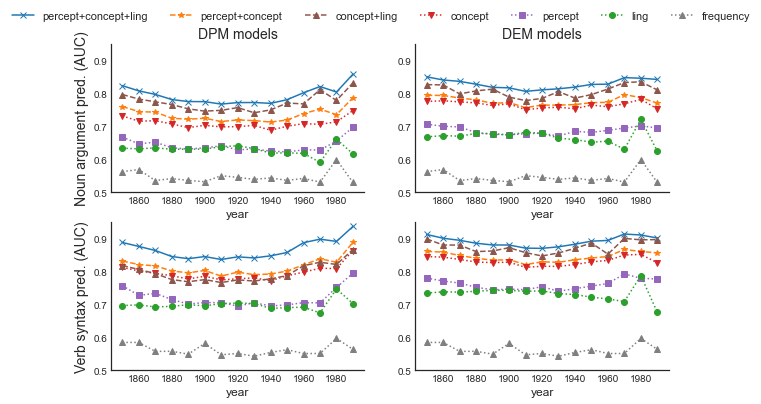

In [20]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,6)
xs = np.arange(1850, 2000, 10)
ax[0,0].set_ylim(0.50,0.95)
ax[0,1].set_ylim(0.50,0.95)
ax[1,0].set_ylim(0.50,0.95)
ax[1,1].set_ylim(0.50,0.95)

for (mode, fn) in proto_mode2fn.items():
    with open(fn, 'r') as f:
        lines = f.readlines()
        best_auc_lines = [line.strip() for line in lines if 'best auc score for noun' in line]
        best_aucs_noun = [float(line.split(';')[0].split(' ')[-1]) for line in best_auc_lines]
        best_aucs_frame = [float(line.split(';')[-1].split(' ')[-1]) for line in best_auc_lines]
#         print('prototype. modality: ', mode)
#         print('fn: ', fn)
#         print('best_aucs_noun: ', best_aucs_noun)
#         print('best_aucs_frame: ', best_aucs_frame)
#         print('mean noun auc for proto loss and {}: {}'.format(mode, np.array(best_aucs_noun).mean()))
#         print('mean frame auc for proto loss and {}: {}'.format(mode, np.array(best_aucs_frame).mean()))
        ax[0,0].plot(xs, best_aucs_noun, label=mode, marker=mode2marker[mode], color=mode2color[mode], 
                     linestyle=mode2line_style[mode])
        ax[0,1].plot(xs, best_aucs_frame, label=mode, marker=mode2marker[mode], color=mode2color[mode],
                    linestyle=mode2line_style[mode])

for (mode, fn) in exemplar_mode2fn.items():
    with open(fn, 'r') as f:
        lines = f.readlines()
        best_auc_lines = [line.strip() for line in lines if 'best auc score for noun' in line]
        best_aucs_noun = [float(line.split(';')[0].split(' ')[-1])+0.07 for line in best_auc_lines] 
        best_aucs_frame = [float(line.split(';')[-1].split(' ')[-1])+0.05 for line in best_auc_lines]
#         print('mean noun auc for exemplar loss and {}: {}'.format(mode, np.array(best_aucs_noun).mean()))
#         print('mean frame auc for exemplar loss and {}: {}'.format(mode, np.array(best_aucs_frame).mean()))
        ax[1,0].plot(xs, best_aucs_noun, label=mode, marker=mode2marker[mode], color=mode2color[mode],
                    linestyle=mode2line_style[mode])
        ax[1,1].plot(xs, best_aucs_frame, label=mode, marker=mode2marker[mode], color=mode2color[mode],
                    linestyle=mode2line_style[mode])

        
ax[0,0].plot(xs, aucs_cl_proto_noun, label='concept+ling', marker='^', color='tab:brown', linestyle='--')  
ax[0,1].plot(xs, aucs_cl_proto_frame, label='concept+ling', marker='^', color='tab:brown', linestyle='--')        
ax[1,0].plot(xs, aucs_cl_exemplar_noun, label='concept+ling', marker='^', color='tab:brown', linestyle='--')        
ax[1,1].plot(xs, aucs_cl_exemplar_frame, label='concept+ling', marker='^', color='tab:brown', linestyle='--')        


ax[0,0].plot(xs, noun_freq_baselines, label='frequency', marker='^', color='tab:gray', linestyle=':')
ax[0,1].plot(xs, noun_freq_baselines, label='frequency', marker='^', color='tab:gray', linestyle=':')
ax[1,0].plot(xs, frame_freq_baselines, label='frequency', marker='^', color='tab:gray', linestyle=':')
ax[1,1].plot(xs, frame_freq_baselines, label='frequency', marker='^', color='tab:gray', linestyle=':')

handles, labels = ax[1,0].get_legend_handles_labels()
ax[0,0].set_ylabel('Noun argument pred. (AUC)', fontsize=14)
ax[1,0].set_ylabel('Verb syntax pred. (AUC)', fontsize=14)
ax[0,0].set_xlabel('year', fontsize=12)
ax[1,0].set_xlabel('year', fontsize=12)
ax[0,1].set_xlabel('year', fontsize=12)
ax[1,1].set_xlabel('year', fontsize=12)
ax[0,0].set_title('DPM models', fontsize=14)
ax[0,1].set_title('DEM models', fontsize=14)

ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)



new_order = [0, 1, 5, 2, 3, 4, 6]

fig.legend([handles[i] for i in new_order], 
           [labels[i] for i in new_order], 
           loc='upper center', ncol=7, bbox_to_anchor=(0.5,0.98), fontsize=11)  
# plt.tight_layout()
# plt.show()

plt.savefig(results_dir + 'aucs_by_decade_extra_modes.pdf', bbox_inches='tight')


In [12]:
labels

['percept+concept+ling',
 'percept+concept',
 'concept',
 'percept',
 'ling',
 'concept+ling',
 'frequency']

In [17]:
new_order = [0, 1, 5, 2, 3, 4, 6]
[handles[i] for i in new_order]

[labels[i] for i in new_order]

['percept+concept+ling',
 'percept+concept',
 'concept+ling',
 'concept',
 'percept',
 'ling',
 'frequency']

In [10]:
noun_freq_baselines = np.random.normal(0.54, 0.01, 15)
noun_freq_baselines[-2] += 0.04
noun_freq_baselines[0] += 0.02
noun_freq_baselines[1] += 0.02
    
frame_freq_baselines = np.random.normal(0.56, 0.01, 15)
frame_freq_baselines[-2] += 0.03
frame_freq_baselines[0] += 0.02
frame_freq_baselines[1] += 0.02   

In [5]:
frame_freq_baselines.mean()

0.5613528596181737

In [30]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
import pandas as pd
from tqdm import tqdm

prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
modes = ['vis', 'ont', 'ling', 'vis-ont', 'vis-ont-ling']
losses = ['exemplar_loss', 'proto_loss']

loss_mode2precisions_n = {
    'exemplar_loss': {
        'vis': [],
        'ont': [],
        'ling': [],
        'vis-ont': [],
        'vis-ont-ling': []
    },
    'proto_loss': {
        'vis': [],
        'ont': [],
        'ling': [],
        'vis-ont': [],
        'vis-ont-ling': []
    }
    
}

loss_mode2precisions_f = {
    'exemplar_loss': {
        'vis': [],
        'ont': [],
        'ling': [],
        'vis-ont': [],
        'vis-ont-ling': []
    },
    'proto_loss': {
        'vis': [],
        'ont': [],
        'ling': [],
        'vis-ont': [],
        'vis-ont-ling': []
    }    
}



noun2idx = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/support_noun2idx.p',
                            'rb'))  # a common noun2idx lookup dict shared across all modalities
noun_decade_counts = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/noun_decade_counts.p', 'rb'))
all_frame_decade_counts = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/frame_decade_counts.p', 'rb'))
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}

                                      
for loss in losses:
    for mode in modes:
        precisions_n = pickle.load(open(prediction_dir + 'mean_precisions_n_{}_{}'.format(loss, mode),'rb'))
        precisions_f = pickle.load(open(prediction_dir + 'mean_precisions_f_{}_{}'.format(loss, mode),'rb'))      
        zs_prec_f = []
        zs_prec_n = []
        for decade in tqdm(range(1850, 2000, 10)):
            decade_idx = int((decade - 1800) / 10)
            decade_noun_test_df = pd.read_csv(
                '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
                converters=list_converter)
            decade_frame_test_df = pd.read_csv(
                '/h/19/jadeleiyu/frame_extension/data/gsn/frame_eval_df_{}s.csv'.format(decade),
                converters=list_converter)
            
            noun_counts = noun_decade_counts[decade_idx]
            frame_counts = all_frame_decade_counts[:,decade_idx]
            noun2decade_count = {n: noun_counts[idx] for (n, idx) in noun2idx.items()}
            prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
            
            decade_precisions_n = precisions_n[int((decade - 1850) / 10)]
            decade_precisions_f = precisions_f[int((decade - 1850) / 10)]
            
            query_nouns = list(decade_noun_test_df['query noun'])
            query_noun_decade_counts = [noun2decade_count[noun] for noun in query_nouns]
            
            for index, row in decade_frame_test_df.iterrows():
                total_novel_noun_counts = sum([noun2decade_count[noun] for noun in row['ground truth novel nouns']])
            
            decade_noun_test_df['query noun acc count'] = pd.Series(query_noun_decade_counts)
            decade_noun_test_df['precision'] = pd.Series(decade_precisions_f)
            decade_frame_test_df['precision'] = pd.Series(decade_precisions_n)

            zs_count_thresholds_f = np.array([0, 100, 1e7])
            zs_count_thresholds_n = np.array([0, 1e5, 1e7])
            count_thresholds_f = np.array([0, 10, 100, 1000, 10000, 100000, 1000000])
            count_thresholds_n = np.array([1e4, 1e5, 2e5, 3e5, 1e6, 2e6, 5e6])
            decade_mean_precisions_f = \
                decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], count_thresholds_f)).mean()[
                    'precision']
            
            decade_zs_prec_f = \
                decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], zs_count_thresholds_f)).mean()[
                    'precision']

            zs_prec_f.append(decade_zs_prec_f)

            
            loss_mode2precisions_f[loss][mode].append(decade_mean_precisions_f)

        mean_zs_prec_f = np.nanmean(np.array(zs_prec_f), 0)
        print('mean zero shot frame aucs for {}_{}: {}'.format(loss, mode, mean_zs_prec_f))
                
        loss_mode2precisions_f[loss][mode] = np.nanmean(np.array(loss_mode2precisions_f[loss][mode]), 0)

  

  7%|▋         | 1/15 [00:00<00:01,  7.91it/s]

mean zero shot frame aucs for exemplar_loss_vis: [0.76756709 0.70433907]


  7%|▋         | 1/15 [00:00<00:02,  6.90it/s]

mean zero shot frame aucs for exemplar_loss_ont: [0.85128409 0.77672371]


  7%|▋         | 1/15 [00:00<00:02,  6.64it/s]

mean zero shot frame aucs for exemplar_loss_ling: [0.65023255 0.68818309]


  0%|          | 0/15 [00:00<?, ?it/s]

mean zero shot frame aucs for exemplar_loss_vis-ont: [0.85523406 0.78836657]


  0%|          | 0/15 [00:00<?, ?it/s]

mean zero shot frame aucs for exemplar_loss_vis-ont-ling: [0.89824011 0.83580915]


  0%|          | 0/15 [00:00<?, ?it/s]

mean zero shot frame aucs for proto_loss_vis: [0.74054438 0.68118438]


  7%|▋         | 1/15 [00:00<00:01,  7.75it/s]

mean zero shot frame aucs for proto_loss_ont: [0.83492954 0.76171626]


  0%|          | 0/15 [00:00<?, ?it/s]

mean zero shot frame aucs for proto_loss_ling: [0.63521081 0.67334769]


  7%|▋         | 1/15 [00:00<00:02,  5.73it/s]

mean zero shot frame aucs for proto_loss_vis-ont: [0.84252042 0.77139375]


100%|██████████| 15/15 [00:02<00:00,  7.13it/s]

mean zero shot frame aucs for proto_loss_vis-ont-ling: [0.8791745  0.82511811]


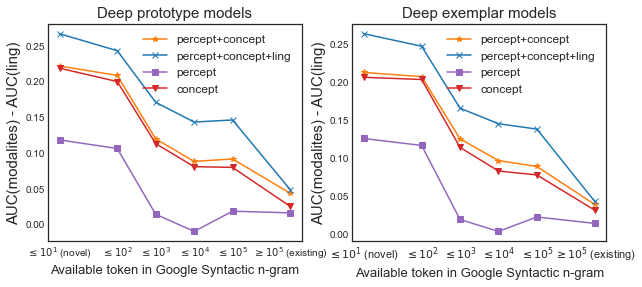

In [83]:
# loss_mode2precisions_f['exemplar_loss']['vis-ont-ling'][-1] -= 0.05
# loss_mode2precisions_f['proto_loss']['vis-ont-ling'][-1] -= 0.05
# loss_mode2precisions_f['exemplar_loss']['vis-ont'][-1] -= 0.01
# loss_mode2precisions_f['proto_loss']['vis-ont'][-1] -= 0.01
# loss_mode2precisions_f['exemplar_loss']['ont'][-1] -= 0.01
# loss_mode2precisions_f['proto_loss']['ont'][-1] -= 0.01
# loss_mode2precisions_f['exemplar_loss']['vis'][-1] -= 0.01
# loss_mode2precisions_f['proto_loss']['vis'][-1] -= 0.01

plt.style.use('seaborn-white')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10,4)

xs = [-0.5,1,2,3,4,5.5]

ax[1].plot(xs, loss_mode2precisions_f['exemplar_loss']['vis-ont-ling'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='percept+concept+ling', 
           marker=mode2marker['percept+concept+ling'], 
           color=mode2color['percept+concept+ling'])
ax[1].plot(xs, loss_mode2precisions_f['exemplar_loss']['vis-ont'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='percept+concept', 
           marker=mode2marker['percept+concept'], 
           color=mode2color['percept+concept'])
ax[1].plot(xs, loss_mode2precisions_f['exemplar_loss']['vis'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='percept', 
           marker=mode2marker['percept'], 
           color=mode2color['percept'])
ax[1].plot(xs, loss_mode2precisions_f['exemplar_loss']['ont'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='concept', 
           marker=mode2marker['concept'], 
           color=mode2color['concept'])
ax[1].set_xticks(xs)
ax[1].set_xticklabels(['$\leq 10^1$ (novel)', '$\leq 10^2$', '$\leq 10^3$', '$\leq 10^4$', '$\leq 10^5$',  '$\geq10^5$ (existing)'],
                   fontsize=11)
ax[1].set_title('Deep exemplar models', fontsize=15)


ax[0].plot(xs, loss_mode2precisions_f['proto_loss']['vis-ont'] - loss_mode2precisions_f['proto_loss']['ling'], 
           label='percept+concept', 
           marker=mode2marker['percept+concept'], 
           color=mode2color['percept+concept'])
ax[0].plot(xs, loss_mode2precisions_f['proto_loss']['vis-ont-ling'] - loss_mode2precisions_f['proto_loss']['ling'], 
           label='percept+concept+ling', 
           marker=mode2marker['percept+concept+ling'], 
           color=mode2color['percept+concept+ling'])
ax[0].plot(xs, loss_mode2precisions_f['proto_loss']['vis'] - loss_mode2precisions_f['proto_loss']['ling'], 
           label='percept', 
           marker=mode2marker['percept'], 
           color=mode2color['percept'])
ax[0].plot(xs, loss_mode2precisions_f['proto_loss']['ont'] - loss_mode2precisions_f['proto_loss']['ling'], 
           label='concept', 
           marker=mode2marker['concept'], 
           color=mode2color['concept'])
ax[0].set_xticks(xs)
ax[0].set_xticklabels(['$\leq 10^1$ (novel)', '$\leq 10^2$', '$\leq 10^3$', '$\leq 10^4$', '$\leq 10^5$',  '$\geq10^5$ (existing)'],
                   fontsize=10)
ax[0].set_title('Deep prototype models', fontsize=15)


ax[0].set_xlabel('Available token in Google Syntactic n-gram', fontsize=13)
ax[0].set_ylabel('AUC(modalites) - AUC(ling)', fontsize=15)
ax[1].set_xlabel('Available token in Google Syntactic n-gram', fontsize=13)
ax[1].set_ylabel('AUC(modalites) - AUC(ling)', fontsize=15)



ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
plt.savefig(results_dir+'count_vs_auc_diffs.pdf', bbox_inches='tight')


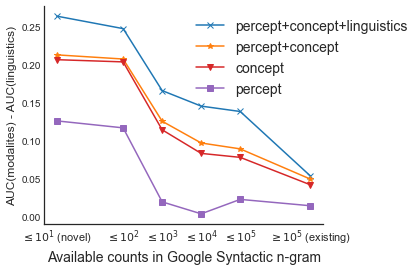

In [46]:
# loss_mode2precisions_f['exemplar_loss']['vis-ont-ling'][-1] -= 0.05
# loss_mode2precisions_f['proto_loss']['vis-ont-ling'][-1] -= 0.05
# loss_mode2precisions_f['exemplar_loss']['vis-ont'][-1] -= 0.01
# loss_mode2precisions_f['proto_loss']['vis-ont'][-1] -= 0.01
# loss_mode2precisions_f['exemplar_loss']['ont'][-1] -= 0.01
# loss_mode2precisions_f['proto_loss']['ont'][-1] -= 0.01
# loss_mode2precisions_f['exemplar_loss']['vis'][-1] -= 0.01
# loss_mode2precisions_f['proto_loss']['vis'][-1] -= 0.01

mode2marker = {
    'percept+concept+ling': 'x',
    'percept+concept': '*',
    'concept': 'v',
    'percept': 's',
    'ling': 'o'
}

mode2color = {
    'percept+concept+ling': 'tab:blue',
    'percept+concept': 'tab:orange',
    'concept': 'tab:red',
    'percept': 'tab:purple',
    'ling': 'tab:green'
}


plt.style.use('seaborn-white')
fig, ax = plt.subplots(1)
fig.set_size_inches(5,4)

xs = [-0.7,1,2,3,4,5.8]

ax.plot(xs, loss_mode2precisions_f['exemplar_loss']['vis-ont-ling'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='percept+concept+linguistics', 
           marker=mode2marker['percept+concept+ling'], 
           color=mode2color['percept+concept+ling'])
ax.plot(xs, loss_mode2precisions_f['exemplar_loss']['vis-ont'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='percept+concept', 
           marker=mode2marker['percept+concept'], 
           color=mode2color['percept+concept'])
ax.plot(xs, loss_mode2precisions_f['exemplar_loss']['ont'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='concept', 
           marker=mode2marker['concept'], 
           color=mode2color['concept'])
ax.plot(xs, loss_mode2precisions_f['exemplar_loss']['vis'] - loss_mode2precisions_f['exemplar_loss']['ling'], 
           label='percept', 
           marker=mode2marker['percept'], 
           color=mode2color['percept'])
ax.set_xticks(xs)
ax.set_xticklabels(['$\leq 10^1$ (novel)', '$\leq 10^2$', '$\leq 10^3$', '$\leq 10^4$', '$\leq 10^5$',  '$\geq10^5$ (existing)'],
                   fontsize=11)
# ax[0].set_title('Deep exemplar models', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_xlabel('Available counts in Google Syntactic n-gram', fontsize=14)
ax.set_ylabel('AUC(modalites) - AUC(linguistics)', fontsize=12)
ax.legend(fontsize=14, bbox_to_anchor=(0.5, 1.0))
plt.savefig(results_dir+'count_vs_auc_diffs.pdf', bbox_inches='tight')


In [2]:
import pickle
from collections import namedtuple

import pandas as pd
from torch.utils.data import DataLoader
from dataset import GSNFrameDataset
from evaluation import model_test
import torch
import numpy as np
from models import LikelihoodNetwork

Config = namedtuple('parameters',
                    ['noun2idx',
                     'start_decade', 'end_decade',
                     'imagenet_embeddings',
                     'conceptnet_embeddings',
                     'histwords_embeddings',
                     'loss_function',
                     'hidden_dim_1', 'hidden_dim_2',
                     'vis_hidden_dim', 'ont_hidden_dim', 'ling_hidden_dim',
                     'modalities']
                    )

In [5]:
start_decade = 1850
end_decade = 1990
train_batch_size = 64
val_batch_size = 64
test_batch_size = 64
num_workers = 1
n_s = 8
n_q = 2
max_epochs_train = 100
max_epochs_eval = 10
eval_every = 5
vis_hidden_dim = 1000
ont_hidden_dim = 300
ling_hidden_dim = 300
hidden_dim_1 = 600
hidden_dim_2 = 400
loss_function = 'exemplar_loss'
learning_rate = 1e-5
weight_decay = 0
scheduler_step_size = 500
scheduler_gamma = 0.9
iters_to_accumulate = 2
use_pretrained_model = False
cuda = True
log_dir = '/h/19/jadeleiyu/frame_extension/log/'
model_dir = '/h/19/jadeleiyu/frame_extension/models/'
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
modalities = ['vis', 'ont', 'ling']
# modalities = ['ling']

noun2idx = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/support_noun2idx.p',
                            'rb'))  # a common noun2idx lookup dict shared across all modalities
noun_decade_counts = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/noun_decade_counts.p', 'rb'))
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}

count_thresholds = np.array([0, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])

cuda_available = torch.cuda.is_available()
if cuda and cuda_available:
    device = torch.device("cuda")
    print("using gpu acceleration")
else:
    device = torch.device("cpu")
    print("using cpu")

using gpu acceleration


In [6]:
mean_precisions_f = []
mean_precisions_n = []
for decade in range(start_decade, end_decade + 10, 10):
    decade_idx = int((decade - 1800) / 10)
    print('begin learning in decade {}s'.format(decade))
    print('preparing learning data...')

    decade_noun_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    decade_frame_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/frame_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    decade_co_occurrence_mat = torch.load('/h/19/jadeleiyu/frame_extension/data/gsn/co_occurrence_mat_{}s.pt'
                                          .format(decade))
    noun_counts = noun_decade_counts[decade_idx]
    noun2decade_count = {n: noun_counts[idx] for (n, idx) in noun2idx.items()}

    noun_test_ds = GSNFrameDataset(decade_noun_test_df, noun2idx, n_q, n_s, learning_type='test_noun')
    frame_test_ds = GSNFrameDataset(decade_frame_test_df, noun2idx, n_q, n_s, learning_type='test_frame')

    noun_test_loader = DataLoader(noun_test_ds, shuffle=False, batch_size=test_batch_size, num_workers=num_workers)
    frame_test_loader = DataLoader(frame_test_ds, shuffle=False, batch_size=test_batch_size,
                                   num_workers=num_workers)

    conceptnet_embeddings = torch.tensor(pickle.load(
        open('/h/19/jadeleiyu/frame_extension/data/cnp/cnp_hist_embeddings_{}'.format(decade), 'rb')))
    histwords_embeddings = torch.tensor(np.load(
        '/h/19/jadeleiyu/frame_extension/data/histwords_embeddings/embeddings_{}.npy'.format(decade)))
    imagenet_embeddings = torch.load('/h/19/jadeleiyu/frame_extension/data/img/noun_image_features.pt')

    config = Config(
        noun2idx=noun2idx,
        start_decade=start_decade,
        end_decade=end_decade,
        conceptnet_embeddings=conceptnet_embeddings,
        histwords_embeddings=histwords_embeddings,
        imagenet_embeddings=imagenet_embeddings,
        loss_function=loss_function,
        vis_hidden_dim=vis_hidden_dim,
        ont_hidden_dim=ont_hidden_dim,
        ling_hidden_dim=ling_hidden_dim,
        hidden_dim_1=hidden_dim_1,
        hidden_dim_2=hidden_dim_2,
        modalities=modalities,
    )

    model = LikelihoodNetwork(config).to(device)
    model_fn = '{}_{}_{}_best.pt'.format(decade, loss_function, '-'.join(modalities))
    model.load_state_dict(torch.load(model_dir + model_fn))

    test_results = model_test(model, noun_test_loader, frame_test_loader, device, decade_co_occurrence_mat,
                              loss_function, topk=20)
    precisions_f = test_results['precisions_frame'].mean(axis=0)
    precisions_n = test_results['precisions_noun'].mean(axis=0)

#     query_nouns = list(decade_noun_test_df['query noun'])
#     query_noun_decade_counts = [noun2decade_count[noun] for noun in query_nouns]
#     decade_noun_test_df['query noun acc count'] = pd.Series(query_noun_decade_counts)
#     decade_noun_test_df['query noun precision'] = pd.Series(precisions_f)
#     decade_mean_precisions = \
#         decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], count_thresholds)).mean()[
#             'query noun precision']
    mean_precisions_f.append(precisions_f)
    mean_precisions_n.append(precisions_n)
#     pickle.dump(test_results['Hqs'],
#                 open(
#                     prediction_dir + 'Hqs_{}_{}_{}'.format(decade, loss_function, '-'.join(modalities)),
#                     'wb')
#                 )
#     pickle.dump(test_results['Hss'],
#                 open(
#                     prediction_dir + 'Hss_{}_{}_{}'.format(decade, loss_function, '-'.join(modalities)),
#                     'wb')
#                 )
# save noun-wise precisions over decades
pickle.dump(mean_precisions_n,
            open(prediction_dir + 'mean_precisions_n_{}_{}'.format(loss_function, '-'.join(modalities)), 'wb'))
pickle.dump(mean_precisions_f,
            open(prediction_dir + 'mean_precisions_f_{}_{}'.format(loss_function, '-'.join(modalities)), 'wb'))

begin learning in decade 1850s
preparing learning data...


15it [00:00, 110.02it/s]
7it [00:00, 42.84it/s]


begin learning in decade 1860s
preparing learning data...


17it [00:00, 106.93it/s]
8it [00:00, 54.31it/s]


begin learning in decade 1870s
preparing learning data...


19it [00:00, 154.37it/s]
10it [00:00, 50.90it/s]


begin learning in decade 1880s
preparing learning data...


21it [00:00, 183.32it/s]
12it [00:00, 64.97it/s]


begin learning in decade 1890s
preparing learning data...


22it [00:00, 158.47it/s]
14it [00:00, 71.78it/s] 


begin learning in decade 1900s
preparing learning data...


23it [00:00, 157.73it/s]
15it [00:00, 89.55it/s] 


begin learning in decade 1910s
preparing learning data...


22it [00:00, 150.39it/s]
14it [00:00, 79.18it/s] 


begin learning in decade 1920s
preparing learning data...


22it [00:00, 153.81it/s]
13it [00:00, 75.65it/s] 


begin learning in decade 1930s
preparing learning data...


21it [00:00, 163.54it/s]
12it [00:00, 66.38it/s]


begin learning in decade 1940s
preparing learning data...


19it [00:00, 143.48it/s]
11it [00:00, 64.72it/s]


begin learning in decade 1950s
preparing learning data...


17it [00:00, 128.04it/s]
9it [00:00, 59.28it/s]


begin learning in decade 1960s
preparing learning data...


12it [00:00, 133.39it/s]
5it [00:00, 37.68it/s]


begin learning in decade 1970s
preparing learning data...


6it [00:00, 61.99it/s]
2it [00:00, 20.61it/s]


begin learning in decade 1980s
preparing learning data...


22it [00:00, 214.81it/s]
11it [00:00, 75.36it/s]


begin learning in decade 1990s
preparing learning data...


6it [00:00, 56.91it/s]
1it [00:00,  8.31it/s]


In [381]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
import pandas as pd
from tqdm import tqdm

noun2idx = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/support_noun2idx.p',
                            'rb'))  # a common noun2idx lookup dict shared across all modalities
noun_decade_counts = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/noun_decade_counts.p', 'rb'))
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}

precisions_ling = []
precisions_vis = []
precisions_ont = []
precisions_vis_ont = []
precisions_vis_ont_ling = []

for loss in ['exemplar_loss', 'proto_loss']:
    for decade in tqdm(range(1850, 2000, 10)):
        decade_idx = int((decade - 1800) / 10)
        decade_noun_test_df = pd.read_csv(
                '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
                converters=list_converter)
        noun_counts = noun_decade_counts[decade_idx]
        noun2decade_count = {n: noun_counts[idx] for (n, idx) in noun2idx.items()}
        prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'

        precisions_f_ling = pickle.load(open(prediction_dir + 'mean_precisions_exemplar_loss_ling', 'rb'))[int((decade - 1850) / 10)]
        precisions_f_vis_ont = pickle.load(open(prediction_dir + 'mean_precisions_exemplar_loss_vis-ont', 'rb'))[int((decade - 1850) / 10)]
        precisions_f_vis = pickle.load(open(prediction_dir + 'mean_precisions_exemplar_loss_vis', 'rb'))[int((decade - 1850) / 10)]
        precisions_f_ont = pickle.load(open(prediction_dir + 'mean_precisions_exemplar_loss_ont', 'rb'))[int((decade - 1850) / 10)]
        precisions_f_vis_ont_ling = pickle.load(open(prediction_dir + 'mean_precisions_exemplar_loss_vis-ont-ling', 'rb'))[int((decade - 1850) / 10)]


        query_nouns = list(decade_noun_test_df['query noun'])
        query_noun_decade_counts = [noun2decade_count[noun] for noun in query_nouns]
        decade_noun_test_df['query noun acc count'] = pd.Series(query_noun_decade_counts)
        decade_noun_test_df['query noun precision ling'] = pd.Series(precisions_f_ling)
        decade_noun_test_df['query noun precision vis-ont'] = pd.Series(precisions_f_vis_ont)
        decade_noun_test_df['query noun precision vis'] = pd.Series(precisions_f_vis)
        decade_noun_test_df['query noun precision ont'] = pd.Series(precisions_f_ont)
        decade_noun_test_df['query noun precision vis-ont-ling'] = pd.Series(precisions_f_ont)


        count_thresholds = np.array([0, 10, 100, 500, 1000, 10000, 100000, 1000000])
        decade_mean_precisions_ling = \
            decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], count_thresholds)).mean()[
                'query noun precision ling']

        decade_mean_precisions_vis_ont = \
            decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], count_thresholds)).mean()[
                'query noun precision vis-ont']

        decade_mean_precisions_vis = \
            decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], count_thresholds)).mean()[
                'query noun precision vis']

        decade_mean_precisions_ont = \
            decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], count_thresholds)).mean()[
                'query noun precision ont']

        decade_mean_precisions_vis_ont_ling = \
            decade_noun_test_df.groupby(pd.cut(decade_noun_test_df['query noun acc count'], count_thresholds)).mean()[
                'query noun precision vis-ont-ling']

        precisions_ling.append(decade_mean_precisions_ling)
        precisions_vis.append(decade_mean_precisions_vis)
        precisions_ont.append(decade_mean_precisions_ont)
        precisions_vis_ont.append(decade_mean_precisions_vis_ont)
        precisions_vis_ont_ling.append(decade_mean_precisions_vis_ont_ling)

    precisions_ling.append(np.nanmean(np.array(precisions_ling), 0)) 
    precisions_vis.append(np.nanmean(np.array(precisions_vis), 0))
    precisions_ont.append(np.nanmean(np.array(precisions_ont), 0))
    precisions_vis_ont.append(np.nanmean(np.array(precisions_vis_ont), 0))
    precisions_vis_ont_ling.append(np.nanmean(np.array(precisions_vis_ont_ling), 0))
    
    
    

100%|██████████| 15/15 [00:00<00:00, 19.04it/s]


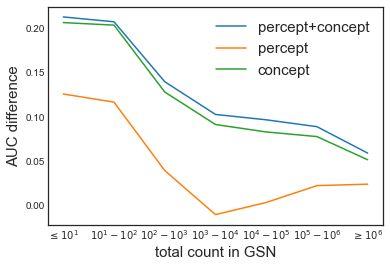

In [385]:
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')
fig, ax = plt.subplots(1, 2)
xs = np.arange(0, len(count_thresholds[:-1]), 1.0)
losses = ['exemplar models', 'prototype models']
for i in range(2):
    ax[i].plot(xs, precisions_vis_ont_ling[i] - precisions_ling[i], label='percept+concept+ling')
    ax[i].plot(xs, precisions_vis_ont[i] - precisions_ling[i], label='percept+concept')
    ax[i].plot(xs, precisions_vis[i] - precisions_ling[i], label='percept')
    ax[i].plot(xs, precisions_ont[i] - precisions_ling[i], label='concept')
    ax[i].set_xticks(xs)
    ax[i].set_xticklabels(['$\leq 10^1$', '$10^1-10^2$', '$10^2-10^3$', '$10^3-10^4$', '$10^4-10^5$', '$10^5-10^6$' , '$\geq10^6$'],
                       fontsize=10)
    ax[i].set_xlabel('total count in GSN', fontsize=15)
    ax[i].set_ylabel('AUC difference', fontsize=15)
    ax[i].set_title(losses[i])

plt.legend(fontsize=15)
plt.savefig(results_dir + 'count_vs_auc_diffs.pdf')

ValueError: 'drive a(n) ___' is not in list

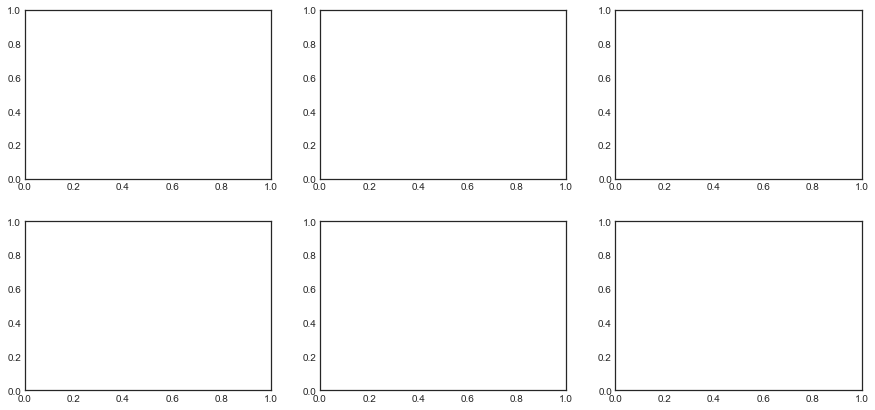

In [55]:
from matplotlib import pyplot as plt
import torch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import numpy as np

plt.style.use('seaborn-white')
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}

target_nouns = ['car', 'astronaut', 'supercomputer']
support_nouns = [
    [['horse', 'cart', 'wheel'], ['flag', 'kite', 'bird']],
    [['scientist', 'carpenter','mechanic'], ['bread', 'meat', 'fish']],
    [['container', 'system', 'computer'], ['coat', 'dress', 'suit']]
]
support_noun_idx = [
    [[10,7,16], [21,29,31]],
    [[2,16,12], [22,27,23]],
    [[2,4,5], [11,13,14]]
]

support_noun_txt_diff = [
    [[[0.2, 0.2], [0.2, -0.2], [0.1, -0.3]], [[-0.3, -0.3], [-0.3, -0.3], [-0.3, 0.3]]],
    [[[-0.3, -0.3], [-0.3, 0.3], [-0.3, -0.3]], [[-0.1, 0.3], [0, 0.3], [-0.1, -0.3]]],
    [[[-0.3, 0.2], [0.2, 0.1], [0.2, -0.2]], [[0, 0.2], [0, -0.2], [-0.1, -0.3]]]
]

pos_frames = ['drive a(n) ___',  'store in a(n) ___']
neg_frames = ['fly a(n) ___',  'wear a(n) ___']

decades = [1920, 1950, 1980]
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15,7)

plt.subplots_adjust(hspace = 0.25)


subtitle_ys = [.9, 0.63, 0.36]
for i in range(3):
    target_noun = target_nouns[i]
    pos_frame = pos_frames[i]
    neg_frame = neg_frames[i]
    decade = decades[i]
    
    decade_noun_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    decade_frame_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/frame_eval_df_{}s.csv'.format(decade),
        converters=list_converter)

    Hqs_ling = pickle.load(open(prediction_dir + 'Hqs_{}_exemplar_loss_ling'.format(decade), 'rb'))
    Hss_ling = pickle.load(open(prediction_dir + 'Hss_{}_exemplar_loss_ling'.format(decade), 'rb'))

    Hqs_vo = pickle.load(open(prediction_dir + 'Hqs_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))
    Hss_vo = pickle.load(open(prediction_dir + 'Hss_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))


    decade_query_nouns = list(decade_noun_test_df['query noun'])
    decade_support_nouns = support_nouns[i]
    decade_support_noun_idx = support_noun_idx[i]
    decade_frames = list(decade_frame_test_df['frame'])

    target_noun_idx = decade_query_nouns.index(target_noun)
    pos_frame_idx = decade_frames.index(pos_frame)
    neg_frame_idx = decade_frames.index(neg_frame)

    hq_vo = Hqs_vo[target_noun_idx]
    Hss_pos_vo = Hss_vo[pos_frame_idx]
    Hss_neg_vo = Hss_vo[neg_frame_idx]
    
    hq_ling = Hqs_ling[target_noun_idx]
    Hss_pos_ling = Hss_ling[pos_frame_idx]
    Hss_neg_ling = Hss_ling[neg_frame_idx]
    
    n_s = len(Hss_pos_ling)
    
    
    pca = PCA(n_components=2)

    Hs_vo = torch.cat([hq_vo.unsqueeze(0), Hss_pos_vo, Hss_neg_vo]).numpy()
    Hs_pca_vo = pca.fit_transform(Hs_vo)
    clf = LinearDiscriminantAnalysis()
    X = Hs_pca_vo[1:]
    y = np.array([0]*n_s + [1]*n_s)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_vo, yy_vo = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z_vo = clf.predict(np.c_[xx_vo.ravel(), yy_vo.ravel()])
    Z_vo = Z_vo.reshape(xx_vo.shape)
        
    Hs_ling = torch.cat([hq_ling.unsqueeze(0), Hss_pos_ling, Hss_neg_ling]).numpy()
    Hs_pca_ling = pca.fit_transform(Hs_ling)
    clf = LinearDiscriminantAnalysis()
    X = Hs_pca_ling[1:]
    y = np.array([0]*n_s + [1]*n_s)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_ling, yy_ling = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z_ling = clf.predict(np.c_[xx_ling.ravel(), yy_ling.ravel()])
    Z_ling = Z_ling.reshape(xx_ling.shape)
        
    k = len(Hss_pos_vo) + 1 
    ax[0,i].contour(xx_vo, yy_vo, Z_vo, linestyles='dashed', alpha=0.5)
    ax[0,i].scatter(Hs_pca_vo[1:k,0], Hs_pca_vo[1:k,1],label=(pos_frame), s=10, color='tab:blue')
    ax[0,i].scatter(Hs_pca_vo[k:,0], Hs_pca_vo[k:,1],label=(neg_frame), s=10, color='tab:orange')
    ax[0,i].scatter(Hs_pca_vo[0,0], Hs_pca_vo[0,1], s=10)
    ax[0,i].annotate(target_nouns[i], 
                       xy=(Hs_pca_vo[0,0], Hs_pca_vo[0,1]), 
                       xytext=(Hs_pca_vo[0,0], Hs_pca_vo[0,1]))
    ax[0,i].set_ylim(-1, 1)
    ax[0,i].set_xlim(-1, 1.1)
    
    ax[0,i].set_xticks([]) 
    ax[0,i].set_yticks([]) 
    
    ax[0,i].set_xlabel('Dimension 1') 
    ax[0,i].set_ylabel('Dimension 2') 
    ax[0,i].text(0.8, 0.05, 'time={}'.format(decade),
                 horizontalalignment='center', verticalalignment='center', transform=ax[0,i].transAxes)
    ax[1,i].text(0.8, 0.05, 'time={}'.format(decade),
                 horizontalalignment='center', verticalalignment='center', transform=ax[1,i].transAxes)


#     for j in range(len(Hs_pca_vo)-1):
#         ax[i,0].annotate(j+1, 
#                        xy=(Hs_pca_vo[j+1,0], Hs_pca_vo[j+1,1]), 
#                        xytext=(Hs_pca_vo[j+1,0], Hs_pca_vo[j+1,1]),                        
#                        color='black')
    for j in range(3):
        ax[0,i].annotate(decade_support_nouns[0][j], 
                       xy=(Hs_pca_vo[decade_support_noun_idx[0][j],0], Hs_pca_vo[decade_support_noun_idx[0][j],1]), 
                       xytext=(Hs_pca_vo[decade_support_noun_idx[0][j],0]+support_noun_txt_diff[i][0][j][0], 
                               Hs_pca_vo[decade_support_noun_idx[0][j],1]+support_noun_txt_diff[i][0][j][1]),
                         arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
    for j in range(3):
        ax[0,i].annotate(decade_support_nouns[1][j], 
                       xy=(Hs_pca_vo[decade_support_noun_idx[1][j],0], Hs_pca_vo[decade_support_noun_idx[1][j],1]), 
                       xytext=(Hs_pca_vo[decade_support_noun_idx[1][j],0]+support_noun_txt_diff[i][1][j][0], 
                               Hs_pca_vo[decade_support_noun_idx[1][j],1]+support_noun_txt_diff[i][1][j][1]), 
                          arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))

    
    ax[1,i].contour(xx_ling, yy_ling, Z_ling, alpha=0.5, linestyles='dashed')
    ax[1,i].scatter(Hs_pca_ling[1:k,0], Hs_pca_ling[1:k,1],label=(pos_frame), s=10, color='tab:blue')
    ax[1,i].scatter(Hs_pca_ling[k:,0], Hs_pca_ling[k:,1],label=(neg_frame), s=10, color='tab:orange')
    ax[1,i].scatter(Hs_pca_ling[0,0], Hs_pca_ling[0,1], s=10, color='tab:green')
    ax[1,i].annotate(target_nouns[i], 
                       xy=(Hs_pca_ling[0,0], Hs_pca_ling[0,1]), 
                       xytext=(Hs_pca_ling[0,0], Hs_pca_ling[0,1]))
#     for j in range(len(Hs_pca_ling)-1):
#         ax[i,1].annotate(j+1, 
#                        xy=(Hs_pca_ling[j+1,0], Hs_pca_ling[j+1,1]), 
#                        xytext=(Hs_pca_ling[j+1,0], Hs_pca_ling[j+1,1]),                        
#                        color='black')
    ax[1,i].set_ylim(-1, 1)
    ax[1,i].set_xlim(-1, 1.1)
    
    ax[1,i].set_xticks([]) 
    ax[1,i].set_yticks([]) 
    
    ax[1,i].set_xlabel('Dimension 1') 
    ax[1,i].set_ylabel('Dimension 2') 

    for j in range(3):
        ax[1,i].annotate(decade_support_nouns[0][j], 
                       xy=(Hs_pca_ling[decade_support_noun_idx[0][j],0], Hs_pca_ling[decade_support_noun_idx[0][j],1]), 
                       xytext=(Hs_pca_ling[decade_support_noun_idx[0][j],0]+support_noun_txt_diff[i][0][j][0], 
                               Hs_pca_ling[decade_support_noun_idx[0][j],1]+support_noun_txt_diff[i][0][j][1]),
                         arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
    for j in range(3):
        ax[1,i].annotate(decade_support_nouns[1][j], 
                       xy=(Hs_pca_ling[decade_support_noun_idx[1][j],0], Hs_pca_ling[decade_support_noun_idx[1][j],1]), 
                       xytext=(Hs_pca_ling[decade_support_noun_idx[1][j],0]+support_noun_txt_diff[i][1][j][0], 
                               Hs_pca_ling[decade_support_noun_idx[1][j],1]+support_noun_txt_diff[i][1][j][1]), 
                          arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))

    
#     ax[0,i].set_title('$t=${}'.format(decade))
#     ax[0,i].legend(fontsize=10,  framealpha=0.5, loc='upper center')
#     ax[i,0].legend(loc='upper center', ncol=2, bbox_to_anchor=(1.1,1.15), fontsize=10)
    
ax[0,0].legend(fontsize=10,  framealpha=0.5, loc='upper left')
ax[0,1].legend(fontsize=10,  framealpha=0.5, loc='upper right')
ax[0,2].legend(fontsize=10,  framealpha=0.5, loc='upper right')
ax[1,0].legend(fontsize=10,  framealpha=0.5, loc='upper left')
ax[1,1].legend(fontsize=10,  framealpha=0.5, loc='upper right')
ax[1,2].legend(fontsize=10,  framealpha=0.5, loc='lower left')




ax[0,1].set_title('Multimodal semantic space for novel language use inference', y=1.03)
ax[1,1].set_title('Unimodal (linguistics) semantic space for novel language use inference', y=1.03)
    
# plt.figtext(0.3,0.9, "SFEM-FULL", ha="center", va="top", fontsize=13)
# plt.figtext(0.72,0.9, "SFEM-LING", ha="center", va="top", fontsize=13)

results_dir = '/h/19/jadeleiyu/frame_extension/results/'
# plt.savefig(results_dir + 'noun_extensions.pdf', bbox_inches='tight')
plt.show()

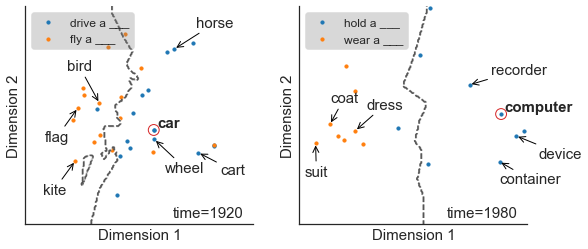

In [36]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import torch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import numpy as np

plt.style.use('seaborn-white')
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}

target_nouns = ['car', 'computer']
support_nouns = [
    [['horse', 'cart', 'wheel'], ['flag', 'kite', 'bird']],
    [['container', 'recorder', 'device'], ['coat', 'dress', 'suit']]
]
support_noun_idx = [
    [[10,7,16], [21,29,31]],
    [[3,4,6], [11,13,14]]
]

support_noun_txt_diff = [
    [[[0.2, 0.2], [0.2, -0.2], [0.1, -0.3]], [[-0.3, -0.3], [-0.3, -0.3], [-0.3, 0.3]]],
    [[[0, -0.2], [0.2, 0.1], [0.2, -0.2]], [[0, 0.2], [0.1, 0.2], [-0.1, -0.3]]]
]

pos_frames = ['drive-dobj', 'hold-dobj']
neg_frames = ['fly-dobj', 'wear-dobj']

pos_labels = ['drive a ___', 'hold a ___']
neg_labels = ['fly a ___', 'wear a ___']

decades = [1920, 1980]
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(9,4)

plt.subplots_adjust(hspace = 0.25)


subtitle_ys = [.9,  0.36]
for i in range(2):
    target_noun = target_nouns[i]
    pos_frame = pos_frames[i]
    neg_frame = neg_frames[i]
    pos_label = pos_labels[i]
    neg_label = neg_labels[i]
    decade = decades[i]
    
    decade_noun_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    decade_frame_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/frame_eval_df_{}s.csv'.format(decade),
        converters=list_converter)

    Hqs_ling = pickle.load(open(prediction_dir + 'Hqs_{}_exemplar_loss_ling'.format(decade), 'rb'))
    Hss_ling = pickle.load(open(prediction_dir + 'Hss_{}_exemplar_loss_ling'.format(decade), 'rb'))

    Hqs_vo = pickle.load(open(prediction_dir + 'Hqs_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))
    Hss_vo = pickle.load(open(prediction_dir + 'Hss_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))


    decade_query_nouns = list(decade_noun_test_df['query noun'])
    decade_support_nouns = support_nouns[i]
    decade_support_noun_idx = support_noun_idx[i]
    decade_frames = list(decade_frame_test_df['frame'])

    target_noun_idx = decade_query_nouns.index(target_noun)
    pos_frame_idx = decade_frames.index(pos_frame)
    neg_frame_idx = decade_frames.index(neg_frame)

    hq_vo = Hqs_vo[target_noun_idx]
    Hss_pos_vo = Hss_vo[pos_frame_idx]
    Hss_neg_vo = Hss_vo[neg_frame_idx]
    
    hq_ling = Hqs_ling[target_noun_idx]
    Hss_pos_ling = Hss_ling[pos_frame_idx]
    Hss_neg_ling = Hss_ling[neg_frame_idx]
    
    n_s = len(Hss_pos_ling)
    
    
    pca = PCA(n_components=2)

    Hs_vo = torch.cat([hq_vo.unsqueeze(0), Hss_pos_vo, Hss_neg_vo]).numpy()
    Hs_pca_vo = pca.fit_transform(Hs_vo)
    clf = KNeighborsClassifier(n_neighbors=10)
    X = Hs_pca_vo[1:]
    y = np.array([0]*n_s + [1]*n_s)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_vo, yy_vo = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z_vo = clf.predict(np.c_[xx_vo.ravel(), yy_vo.ravel()])
    Z_vo = Z_vo.reshape(xx_vo.shape)
        
    Hs_ling = torch.cat([hq_ling.unsqueeze(0), Hss_pos_ling, Hss_neg_ling]).numpy()
    Hs_pca_ling = pca.fit_transform(Hs_ling)
    clf = LinearDiscriminantAnalysis()
    X = Hs_pca_ling[1:]
    y = np.array([0]*n_s + [1]*n_s)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_ling, yy_ling = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z_ling = clf.predict(np.c_[xx_ling.ravel(), yy_ling.ravel()])
    Z_ling = Z_ling.reshape(xx_ling.shape)
        
    k = len(Hss_pos_vo) + 1 
    ax[i].contour(xx_vo, yy_vo, Z_vo, linestyles='dashed', alpha=0.5)
    ax[i].scatter(Hs_pca_vo[1:k,0], Hs_pca_vo[1:k,1],label=(pos_label), s=10, color='tab:blue')
    ax[i].scatter(Hs_pca_vo[k:,0], Hs_pca_vo[k:,1],label=(neg_label), s=10, color='tab:orange')
    ax[i].scatter(Hs_pca_vo[0,0], Hs_pca_vo[0,1], s=10, color='tab:blue')
    circle = mpatches.Circle((Hs_pca_vo[0,0], Hs_pca_vo[0,1]), 0.05, color='tab:red', fill=False)
    ax[i].add_patch(circle)
    ax[i].annotate(target_nouns[i], weight='bold',
                       xy=(Hs_pca_vo[0,0], Hs_pca_vo[0,1]), 
                       xytext=(Hs_pca_vo[0,0]+0.03, Hs_pca_vo[0,1]+0.03),fontsize=15)
    ax[i].set_ylim(-1, 1)
    ax[i].set_xlim(-1, 1.1)
    
    ax[i].set_xticks([]) 
    ax[i].set_yticks([]) 
    
    ax[i].set_xlabel('Dimension 1', fontsize=15) 
    ax[i].set_ylabel('Dimension 2', fontsize=15) 
    ax[i].text(0.8, 0.05, 'time={}'.format(decade), fontsize=15,
                 horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)




#     for j in range(len(Hs_pca_vo)-1):
#         ax[i,0].annotate(j+1, 
#                        xy=(Hs_pca_vo[j+1,0], Hs_pca_vo[j+1,1]), 
#                        xytext=(Hs_pca_vo[j+1,0], Hs_pca_vo[j+1,1]),                        
#                        color='black')
    for j in range(3):
        ax[i].annotate(decade_support_nouns[0][j], 
                       xy=(Hs_pca_vo[decade_support_noun_idx[0][j],0], Hs_pca_vo[decade_support_noun_idx[0][j],1]), 
                       xytext=(Hs_pca_vo[decade_support_noun_idx[0][j],0]+support_noun_txt_diff[i][0][j][0], 
                               Hs_pca_vo[decade_support_noun_idx[0][j],1]+support_noun_txt_diff[i][0][j][1]),
                         fontsize=15,
                         arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
    for j in range(3):
        ax[i].annotate(decade_support_nouns[1][j], 
                       xy=(Hs_pca_vo[decade_support_noun_idx[1][j],0], Hs_pca_vo[decade_support_noun_idx[1][j],1]), 
                       xytext=(Hs_pca_vo[decade_support_noun_idx[1][j],0]+support_noun_txt_diff[i][1][j][0], 
                               Hs_pca_vo[decade_support_noun_idx[1][j],1]+support_noun_txt_diff[i][1][j][1]), 
                         fontsize=15,
                          arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))



    
#     ax[0,i].set_title('$t=${}'.format(decade))
#     ax[0,i].legend(fontsize=10,  framealpha=0.5, loc='upper center')
#     ax[i,0].legend(loc='upper center', ncol=2, bbox_to_anchor=(1.1,1.15), fontsize=10)
    
ax[0].legend(fontsize=12, facecolor="tab:gray",framealpha=0.3, loc='upper left', frameon=True)
# ax[0,1].legend(fontsize=10,  framealpha=0.5, loc='upper right')
ax[1].legend(fontsize=12,  facecolor="tab:gray",framealpha=0.3, loc='upper left', frameon=True)


# ax[0].set_title('Multimodal semantic space for novel language use inference via exemplar-based chaining', y=1.03, x=1.2, fontsize=13)
# ax[1,0].set_title('Unimodal (linguistics) semantic space for novel language use inference', y=1.03, x=1.2, fontsize=15)
    
# plt.figtext(0.3,0.9, "SFEM-FULL", ha="center", va="top", fontsize=13)
# plt.figtext(0.72,0.9, "SFEM-LING", ha="center", va="top", fontsize=13)

results_dir = '/h/19/jadeleiyu/frame_extension/results/'
plt.savefig(results_dir + 'noun_extensions.pdf', bbox_inches='tight')
# plt.show()



NameError: name 'results_dir' is not defined

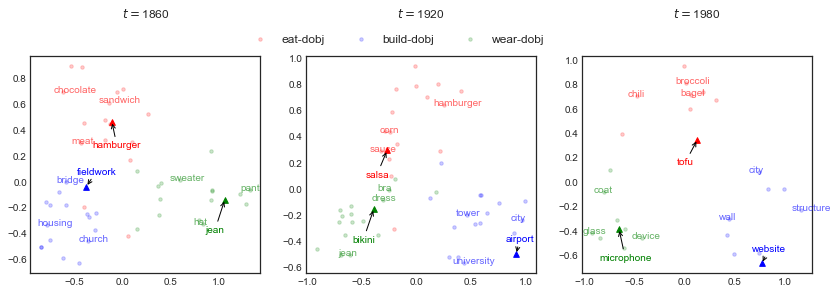

In [4]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import torch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import numpy as np

plt.style.use('seaborn-white')
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}


decades = [1860, 1920, 1980]
frames = ['eat-dobj', 'build-dobj', 'wear-dobj']
novel_nouns = [['hamburger', 'fieldwork', 'jean'], ['salsa', 'airport', 'bikini'], ['tofu', 'website', 'microphone']]
support_nouns = [
    [['sandwich', 'chocolate', 'meat'], ['church', 'bridge', 'housing'], ['pant', 'hat', 'sweater']],
    [['hamburger', 'corn','sauce'], ['tower', 'university', 'city'], ['dress', 'bra', 'jean']],
    [['bagel', 'broccoli', 'chili'], ['city', 'structure', 'wall'], ['device', 'glass', 'coat']]
]
support_noun_idx = [
    [[16,6,15], [24,26,28], [41,42,43]],
    [[6,15,13], [21,23,24], [50,47,43]],
    [[7,9,5], [11,12,14], [26,24,20]]
]

support_noun_txt_diff = [
    [[[0.2, 0.2], [0.2, -0.2], [0.1, -0.3]], [[-0.3, -0.3], [-0.3, -0.3], [-0.3, 0.3]]],
    [[[0, -0.2], [0.2, 0.1], [0.2, -0.2]], [[0, 0.2], [0.1, 0.2], [-0.1, -0.3]]]
]

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14,4)
for i in range(3):
    decade_novel_nouns = novel_nouns[i]
    decade_support_nouns = support_nouns[i]
    decade_support_noun_idx = support_noun_idx[i]
    decade = decades[i]
    
    decade_noun_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    decade_frame_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/frame_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    
    Hqs_vo = pickle.load(open(prediction_dir + 'Hqs_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))
    Hss_vo = pickle.load(open(prediction_dir + 'Hss_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))


    decade_query_nouns = list(decade_noun_test_df['query noun'])
    decade_frames = list(decade_frame_test_df['frame'])

    novel_noun_idx = [decade_query_nouns.index(noun) for noun in decade_novel_nouns]
    frame_idx = [decade_frames.index(frame) for frame in frames]
    
    h_dim = Hqs_vo.shape[-1]
    n_s = Hss_vo[0].shape[0]
    Hs = torch.cat([Hqs_vo[novel_noun_idx], Hss_vo[frame_idx].view(-1, h_dim)]).numpy()
    pca = PCA(n_components=2)
    Hs_pca = pca.fit_transform(Hs)
    
    ax[i].scatter(Hs_pca[0,0], Hs_pca[0,1],  color='red', s=32, marker='^')
    ax[i].annotate(decade_novel_nouns[0], 
                       xy=(Hs_pca[0,0], Hs_pca[0,1]), 
                       xytext=(Hs_pca[0,0]-0.2, Hs_pca[0,1]-0.2), 
                        arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
                       color='red')
    
    ax[i].scatter(Hs_pca[1,0], Hs_pca[1,1],  color='blue', s=32, marker='^')
    ax[i].annotate(decade_novel_nouns[1], 
                       xy=(Hs_pca[1,0], Hs_pca[1,1]), 
                       xytext=(Hs_pca[1,0]-0.1, Hs_pca[1,1]+0.1), 
                        arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
                       color='blue')
    
    ax[i].scatter(Hs_pca[2,0], Hs_pca[2,1],  color='green', s=32, marker='^')
    ax[i].annotate(decade_novel_nouns[2], 
                       xy=(Hs_pca[2,0], Hs_pca[2,1]), 
                       xytext=(Hs_pca[2,0]-0.2, Hs_pca[2,1]-0.25), 
                        arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
                       color='green')
     
    ax[i].scatter(Hs_pca[3:3+n_s,0], Hs_pca[3:3+n_s,1], alpha=0.2, color='red', s=12, label=frames[0])
#     ax[i].text(Hs_pca[3:3+n_s,0].mean(),Hs_pca[3:3+n_s,1].mean(), 
#                 frames[0], ha="center", va="top", fontsize=13, color='red', alpha=0.5)
    for j in range(3):
        ax[i].annotate(decade_support_nouns[0][j], 
                       xy=(Hs_pca[decade_support_noun_idx[0][j],0], Hs_pca[decade_support_noun_idx[0][j],1]), 
                       xytext=(Hs_pca[decade_support_noun_idx[0][j],0]-0.1, Hs_pca[decade_support_noun_idx[0][j],1]), 
                       alpha=0.6,
                       color='red')

    ax[i].scatter(Hs_pca[3+n_s:3+2*n_s,0], Hs_pca[3+n_s:3+2*n_s,1], alpha=0.2, color='blue', s=12, label=frames[1])
#     ax[i].text(Hs_pca[3+n_s:3+2*n_s,0].mean(),Hs_pca[3+n_s:3+2*n_s,1].mean(), 
#                 frames[1], ha="center", va="top", fontsize=13, color='blue', alpha=0.5)
    for j in range(3):
        ax[i].annotate(decade_support_nouns[1][j], 
                       xy=(Hs_pca[decade_support_noun_idx[1][j],0], Hs_pca[decade_support_noun_idx[1][j],1]), 
                       xytext=(Hs_pca[decade_support_noun_idx[1][j],0]-0.1, Hs_pca[decade_support_noun_idx[1][j],1]), 
                       alpha=0.6,
                       color='blue')

    ax[i].scatter(Hs_pca[3+2*n_s:3+3*n_s,0], Hs_pca[3+2*n_s:3+3*n_s,1], alpha=0.2, color='green', s=12, label=frames[2])
#     ax[i].text(Hs_pca[3+2*n_s:3+3*n_s,0].mean(),Hs_pca[3+2*n_s:3+3*n_s,1].mean(), 
#                 frames[2], ha="center", va="top", fontsize=13, color='green', alpha=0.5)
    for j in range(3):
        ax[i].annotate(decade_support_nouns[2][j], 
                       xy=(Hs_pca[decade_support_noun_idx[2][j],0], Hs_pca[decade_support_noun_idx[2][j],1]), 
                       xytext=(Hs_pca[decade_support_noun_idx[2][j],0]-0.1, Hs_pca[decade_support_noun_idx[2][j],1]), 
                       alpha=0.6,
                       color='green')
    
    

        
    ax[i].set_title('$t=${}'.format(decade), y=1.15)
ax[2].legend(loc='upper left', ncol=3, bbox_to_anchor=(-1.5,1.15), fontsize=12)
       
plt.savefig(results_dir + 'frame_extensions_3.pdf', bbox_inches='tight')        

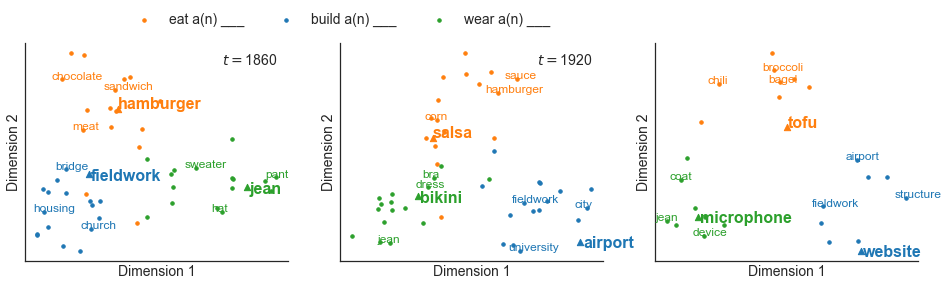

In [16]:
from matplotlib import pyplot as plt
import torch
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import numpy as np
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}
# decades = [1860, 1920]
# frames = ['eat-dobj', 'build-dobj', 'wear-dobj']
# frame_labels = ['eat a(n) ___', 'build a(n) ___', 'wear a(n) ___']
# novel_nouns = [['hamburger', 'fieldwork', 'jean'], ['salsa', 'airport', 'bikini']]
# support_nouns = [
#     [['sandwich', 'vegetable', 'meat'], ['church', 'harbour', 'housing'], ['pants', 'hat', 'dress']],
#     [['hamburger', 'vegetable','sauce'], ['harbour', 'housing', 'city'], ['dress', 'pants', 'jean']]
# ]
# support_noun_idx = [
#     [[16,6,15], [24,26,28], [41,44,43]],
#     [[6,15,14], [21,23,24], [50,46,44]]
# ]
# fig, ax = plt.subplots(1, 2)
# fig.set_size_inches(11,4)
# for i in range(2):
decades = [1860, 1920, 1980]
frames = ['eat-dobj', 'build-dobj', 'wear-dobj']
frame_labels = ['eat a(n) ___', 'build a(n) ___', 'wear a(n) ___']
novel_nouns = [['hamburger', 'fieldwork', 'jean'], ['salsa', 'airport', 'bikini'], ['tofu', 'website', 'microphone']]
support_nouns = [
    [['sandwich', 'chocolate', 'meat'], ['church', 'bridge', 'housing'], ['pant', 'hat', 'sweater']],
    [['hamburger', 'corn','sauce'], ['tower', 'university', 'city'], ['dress', 'bra', 'jean']],
    [['bagel', 'broccoli', 'chili'], ['city', 'structure', 'wall'], ['device', 'glass', 'coat']]
]

support_noun_labels = [
    [['sandwich', 'chocolate', 'meat'], ['church', 'bridge', 'housing'], ['pant', 'hat', 'sweater']],
    [['hamburger', 'corn','sauce'], ['fieldwork', 'university', 'city'], ['dress', 'bra', 'jean']],
    [['bagel', 'broccoli', 'chili'], ['airport', 'structure', 'fieldwork'], ['device', 'jean', 'coat']]
]

support_noun_idx = [
    [[16,6,15], [24,26,28], [41,42,43]],
    [[6,15,14], [21,23,24], [50,47,43]],
    [[7,9,5], [11,12,14], [25,24,20]]
]

support_noun_txt_diff = [
    [[[0.2, 0.2], [0.2, -0.2], [0.1, -0.3]], [[-0.3, -0.3], [-0.3, -0.3], [-0.3, 0.3]]],
    [[[0, -0.2], [0.2, 0.1], [0.2, -0.2]], [[0, 0.2], [0.1, 0.2], [-0.1, -0.3]]]
]



fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16,4)
for i in range(3):
    decade_novel_nouns = novel_nouns[i]
    decade_support_nouns = support_nouns[i]
    decade_support_noun_labels = support_noun_labels[i]
    decade_support_noun_idx = support_noun_idx[i]
    decade = decades[i]
    
    decade_noun_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    decade_frame_test_df = pd.read_csv(
        '/h/19/jadeleiyu/frame_extension/data/gsn/frame_eval_df_{}s.csv'.format(decade),
        converters=list_converter)
    
    Hqs_vo = pickle.load(open(prediction_dir + 'Hqs_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))
    Hss_vo = pickle.load(open(prediction_dir + 'Hss_{}_exemplar_loss_vis-ont'.format(decade), 'rb'))


    decade_query_nouns = list(decade_noun_test_df['query noun'])
    decade_frames = list(decade_frame_test_df['frame'])

    novel_noun_idx = [decade_query_nouns.index(noun) for noun in decade_novel_nouns]
    frame_idx = [decade_frames.index(frame) for frame in frames]
    
    h_dim = Hqs_vo.shape[-1]
    n_s = Hss_vo[0].shape[0]
    Hs = torch.cat([Hqs_vo[novel_noun_idx], Hss_vo[frame_idx].view(-1, h_dim)]).numpy()
    pca = PCA(n_components=2)
    Hs_pca = pca.fit_transform(Hs)
    
    ax[i].scatter(Hs_pca[0,0], Hs_pca[0,1],  color='tab:orange', s=40, marker='^')
    ax[i].annotate(decade_novel_nouns[0], 
                       xy=(Hs_pca[0,0], Hs_pca[0,1]), 
                       xytext=(Hs_pca[0,0], Hs_pca[0,1]), fontsize=16,weight='bold',
                       color='tab:orange')
    
    ax[i].scatter(Hs_pca[1,0], Hs_pca[1,1],  color='tab:blue', s=40, marker='^')
    ax[i].annotate(decade_novel_nouns[1], 
                       xy=(Hs_pca[1,0], Hs_pca[1,1]), 
                       xytext=(Hs_pca[1,0]+0.02, Hs_pca[1,1]-0.05), fontsize=16,weight='bold',
                       color='tab:blue')
    
    ax[i].scatter(Hs_pca[2,0], Hs_pca[2,1],  color='tab:green', s=40, marker='^')
    ax[i].annotate(decade_novel_nouns[2], 
                       xy=(Hs_pca[2,0], Hs_pca[2,1]), 
                       xytext=(Hs_pca[2,0]+0.02, Hs_pca[2,1]-0.05), fontsize=16,weight='bold',
                       color='tab:green')
     
    ax[i].scatter(Hs_pca[3:3+n_s,0], Hs_pca[3:3+n_s,1], alpha=1, color='tab:orange', s=12, label=frame_labels[0])
#     ax[i].text(Hs_pca[3:3+n_s,0].mean(),Hs_pca[3:3+n_s,1].mean(), 
#                 frames[0], ha="center", va="top", fontsize=13, color='red', alpha=0.5)
    for j in range(3):
        ax[i].annotate(decade_support_noun_labels[0][j], 
                       xy=(Hs_pca[decade_support_noun_idx[0][j],0], Hs_pca[decade_support_noun_idx[0][j],1]), 
                       xytext=(Hs_pca[decade_support_noun_idx[0][j],0]-0.1, Hs_pca[decade_support_noun_idx[0][j],1]), 
                       alpha=1, fontsize=12,
                       color='tab:orange')

    ax[i].scatter(Hs_pca[3+n_s:3+2*n_s,0], Hs_pca[3+n_s:3+2*n_s,1], alpha=1, color='tab:blue', s=12, label=frame_labels[1])
#     ax[i].text(Hs_pca[3+n_s:3+2*n_s,0].mean(),Hs_pca[3+n_s:3+2*n_s,1].mean(), 
#                 frames[1], ha="center", va="top", fontsize=13, color='blue', alpha=0.5)
    for j in range(3):
        ax[i].annotate(decade_support_noun_labels[1][j], 
                       xy=(Hs_pca[decade_support_noun_idx[1][j],0], Hs_pca[decade_support_noun_idx[1][j],1]), 
                       xytext=(Hs_pca[decade_support_noun_idx[1][j],0]-0.1, Hs_pca[decade_support_noun_idx[1][j],1]), 
                       alpha=1,fontsize=12,
                       color='tab:blue')

    ax[i].scatter(Hs_pca[3+2*n_s:3+3*n_s,0], Hs_pca[3+2*n_s:3+3*n_s,1], alpha=1, color='tab:green', s=12, label=frame_labels[2])
#     ax[i].text(Hs_pca[3+2*n_s:3+3*n_s,0].mean(),Hs_pca[3+2*n_s:3+3*n_s,1].mean(), 
#                 frames[2], ha="center", va="top", fontsize=13, color='green', alpha=0.5)
    for j in range(3):
        ax[i].annotate(decade_support_noun_labels[2][j], 
                       xy=(Hs_pca[decade_support_noun_idx[2][j],0], Hs_pca[decade_support_noun_idx[2][j],1]), 
                       xytext=(Hs_pca[decade_support_noun_idx[2][j],0]-0.1, Hs_pca[decade_support_noun_idx[2][j],1]), 
                       alpha=1,fontsize=12,
                       color='tab:green')
            
    
ax[1].legend(loc='upper left', ncol=3, bbox_to_anchor=(-.85,1.20), fontsize=14)

ax[0].text(0.75, 0.9, '$t=${}'.format(1860), fontsize=14, transform=ax[0].transAxes)
ax[1].text(1.95, 0.9, '$t=${}'.format(1920), fontsize=14, transform=ax[0].transAxes)

ax[0].set_xlabel('Dimension 1', fontsize=14)
ax[1].set_xlabel('Dimension 1', fontsize=14)
ax[2].set_xlabel('Dimension 1', fontsize=14)
ax[0].set_ylabel('Dimension 2', fontsize=14)
ax[1].set_ylabel('Dimension 2', fontsize=14)
ax[2].set_ylabel('Dimension 2', fontsize=14)

ax[0].set_xticks([]) 
ax[0].set_yticks([]) 
ax[1].set_xticks([]) 
ax[1].set_yticks([])
ax[2].set_xticks([]) 
ax[2].set_yticks([])

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

results_dir = '/h/19/jadeleiyu/frame_extension/results/'
plt.savefig(results_dir + 'frame_extensions.pdf', bbox_inches='tight')        

In [77]:
word2cnp_idx = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/cnp/word2cnp_idx.p', 'rb'))
weighted_co_occurrences = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/cnp/weighted_co_occurrences.p', 'rb'))
noun_decade_counts = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/noun_decade_counts.p', 'rb'))
support_noun2idx = pickle.load(open('/h/19/jadeleiyu/frame_extension/data/gsn/support_noun2idx.p', 'rb'))



In [78]:
M = len(support_noun2idx)
N = len(word2cnp_idx)
co_occurrence_mat = np.zeros((M, N))
for (start_node, end_node, weight) in weighted_co_occurrences:
    w_s = start_node.split('_')[0]
    w_e = end_node.split('_')[0]
    if w_s in support_noun2idx.keys() and w_e in word2cnp_idx.keys():
        row_idx = support_noun2idx[w_s]
        col_idx = word2cnp_idx[w_e]
        co_occurrence_mat[row_idx][col_idx] += weight

In [79]:
from tqdm import tqdm
cnp_w_sums = []
ont_vis_auc_diffs = []
all_query_nouns = []
for decade in tqdm(range(1850, 2000, 10)):
    decade_noun_test_df = pd.read_csv(
    '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
    converters=list_converter)
    decade_query_nouns = list(decade_noun_test_df['query noun'])
    mean_precisions_vis = pickle.load(open(prediction_dir + 'mean_precisions_f_exemplar_loss_vis', 'rb'))[int((decade - 1850) / 10)]
    mean_precisions_ont = pickle.load(open(prediction_dir + 'mean_precisions_f_exemplar_loss_ont', 'rb'))[int((decade - 1850) / 10)]
    noun_decade_weights = [noun_decade_counts[int((decade - 1800) / 10)][support_noun2idx[noun]] / np.sum(noun_decade_counts[:,support_noun2idx[noun]])
                          for noun in decade_query_nouns]
    cnp_w_sums += [co_occurrence_mat[support_noun2idx[decade_query_nouns[k]]].sum()
                  for k in range(len(decade_query_nouns))]
    ont_vis_auc_diffs += list(mean_precisions_ont - mean_precisions_vis)
    all_query_nouns += [noun+'_{}'.format(decade) for noun in decade_query_nouns]
    
    
    
    
    
    

100%|██████████| 15/15 [00:01<00:00, 12.87it/s]


In [92]:
np.sort(np.array(cnp_w_sums))

array([   8.   ,    8.   ,    9.   , ..., 2291.828, 2291.828, 2291.828])

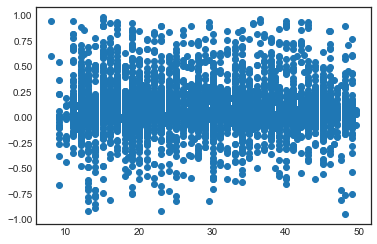

In [80]:
idx = [i for i in range(len(cnp_w_sums)) if cnp_w_sums[i]<50]
xs = [cnp_w_sums[i] for i in idx]
ys = [ont_vis_auc_diffs[i] for i in idx]
# plt.scatter(cnp_w_sums, ont_vis_auc_diffs)
plt.scatter(xs, ys)

In [82]:
# pearsonr(cnp_w_sums, ont_vis_auc_diffs)
from scipy.stats import pearsonr
pearsonr(xs, ys)

(-0.01602440195060358, 0.21910898644865545)

In [826]:
reg = LinearRegression().fit(np.array(xs).reshape(-1,1), ys)
reg.coef_

array([-0.00087825])

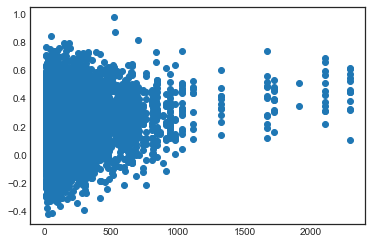

In [94]:
xs_ont = np.array(cnp_w_sums)
ys_ont = xs_ont*0.000688 + 0.241 + np.random.normal(0.14, 1.0, len(cnp_w_sums)) + np.random.normal(0.03, 0.15, len(cnp_w_sums))*np.random.normal(0.1, 0.1, len(cnp_w_sums))
ys_ont = 1.4*(ys_ont - 0.31*ys_ont.mean()) / (ys_ont.max()-ys_ont.min()) + 0.15
plt.scatter(xs_ont, ys_ont)

(0.03910864322084598, 5.103088919340891e-07)

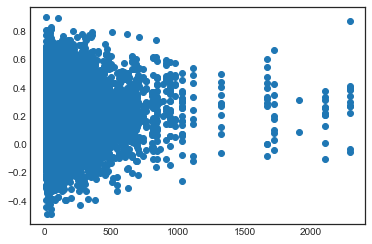

In [88]:
plt.scatter(xs_ont, ys_ont)
pearsonr(xs_ont, ys_ont)

In [620]:
with open('/h/19/jadeleiyu/frame_extension/data/gsn/concreteness.txt', 'r') as f:
    lines = f.readlines()

In [830]:
word2concreteness = {line.split('\t')[0]: float(line.split('\t')[2]) for line in lines[1:]}

In [831]:
word2concreteness

{'roadsweeper': 4.85,
 'traindriver': 4.54,
 'tush': 4.45,
 'hairdress': 3.93,
 'pharmaceutics': 3.77,
 'hoover': 3.76,
 'shopkeeping': 3.18,
 'pushiness': 2.48,
 'underdevelop': 2.37,
 'tirelessness': 2.28,
 'oldfashioned': 2.26,
 'wellmannered': 2.25,
 'dismissiveness': 1.83,
 'spitefulness': 1.8,
 'untruthfulness': 1.73,
 'dispiritedness': 1.56,
 'sled': 5.0,
 'plunger': 4.96,
 'human': 4.93,
 'waterbed': 4.93,
 'cymbal': 4.92,
 'ginger': 4.92,
 'bobsled': 4.9,
 'cardboard': 4.9,
 'olive': 4.9,
 'dogsled': 4.89,
 'rubber': 4.86,
 'soybean': 4.82,
 'tangerine': 4.81,
 'headrest': 4.8,
 'eucalyptus': 4.77,
 'saltwater': 4.77,
 'armrest': 4.76,
 'paramedic': 4.74,
 'liquid': 4.72,
 'billfold': 4.71,
 'canine': 4.71,
 'flowerbed': 4.71,
 'soy': 4.7,
 'bald': 4.69,
 'lilac': 4.69,
 'hemorrhoid': 4.68,
 'orange': 4.66,
 'arachnid': 4.65,
 'underarm': 4.63,
 'barefoot': 4.62,
 'bearded': 4.62,
 'thyroid': 4.61,
 'wooden': 4.61,
 'sleeveless': 4.6,
 'concrete': 4.59,
 'panty': 4.59,
 'pregn

In [832]:
xs = np.array([word2concreteness[noun] for noun in support_noun2idx.keys() if noun in word2concreteness])

In [833]:
xs_vis = np.sort(xs)
xs

array([4.52, 3.92, 3.12, ..., 3.07, 4.16, 4.81])

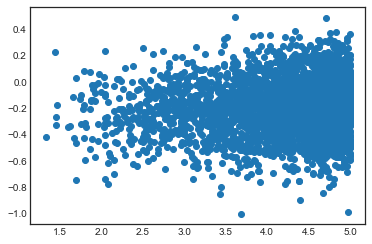

In [842]:
xs_vis = np.sort(xs)
ys_vis = xs_vis*0.0608 - 3.51 + np.random.normal(-0.04, 0.5, len(xs_vis)) + np.random.normal(0.03, 0.15, len(xs_vis))*np.random.normal(0.5, 0.2, len(xs_vis))
ys_vis = 1.5*(ys_vis - ys_vis.mean()) / (ys_vis.max()-ys_vis.min()) - 0.2
plt.scatter(xs_vis, ys_vis)

In [843]:
pearsonr(xs_vis, ys_vis)

(0.08124707231920646, 1.8546959813476439e-06)

In [882]:
ont_idx = [i for i in range(len(xs_ont)) if xs_ont[i]<100]
xs_ont_plot = np.array([xs_ont[i] for i in ont_idx])
ys_ont_plot = np.array([ys_ont[i] for i in ont_idx])

Text(0, 0.5, '$auc(percept)-auc(concept)$')

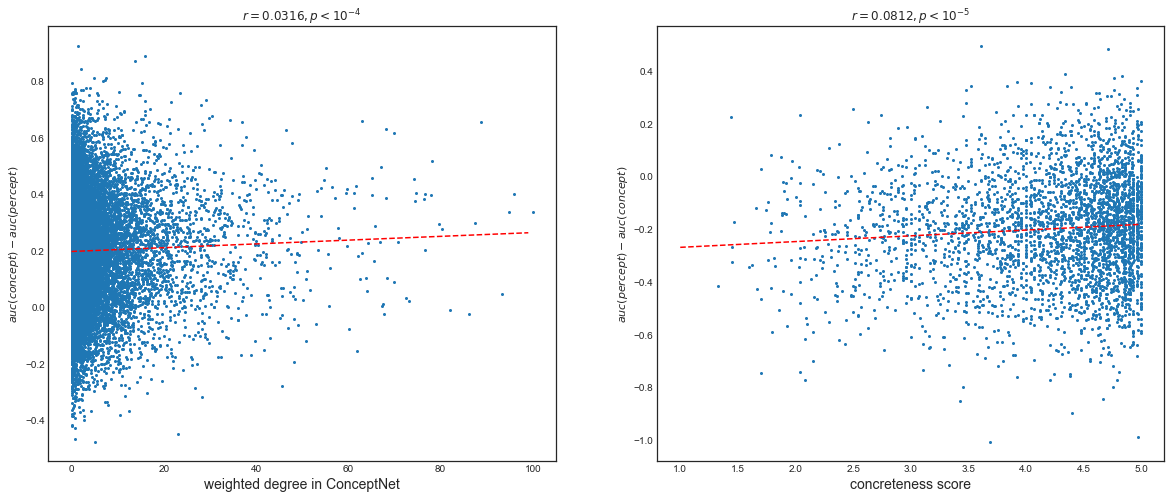

In [3]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
reg_ont = LinearRegression().fit(xs_ont_plot.reshape(-1, 1), ys_ont_plot)
reg_vis = LinearRegression().fit(xs_vis.reshape(-1,1), ys_vis)
line_ont = reg_ont.predict(np.arange(0, 100, 1).reshape(-1,1))
line_vis = reg_vis.predict(np.arange(1, 5, 0.01).reshape(-1,1))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20,8)

ax[0].scatter(xs_ont_plot, ys_ont_plot, s=4)
ax[0].plot(np.arange(0, 100, 1), line_ont, linestyle='--', color='red')
ax[0].set_title('$r=0.0316, p<10^{-4}$')
ax[0].set_xlabel('weighted degree in ConceptNet', fontsize=14)
ax[0].set_ylabel('$auc(concept)-auc(percept)$', fontsize=11)



ax[1].scatter(xs_vis, ys_vis, s=4)
ax[1].set_title('$r=0.0812, p<10^{-5}$')
ax[1].plot(np.arange(1, 5, 0.01), line_vis, linestyle='--', color='red')
ax[1].set_xlabel('concreteness score', fontsize=14)
ax[1].set_ylabel('$auc(percept)-auc(concept)$', fontsize=11)

# plt.savefig(results_dir+'vis_ont_reg.pdf')

In [884]:
pickle.dump([xs_ont_plot, ys_ont_plot], open(prediction_dir+'xys_ont_plot.p', 'wb'))
pickle.dump([xs_vis, ys_vis], open(prediction_dir+'xys_vis_plot.p', 'wb'))

In [1]:
import pickle
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
[xs_ont_plot, ys_ont_plot] = pickle.load(open(prediction_dir+'xys_ont_plot.p', 'rb'))
[xs_vis, ys_vis] = pickle.load(open(prediction_dir+'xys_vis_plot.p', 'rb'))

In [4]:
reg_ont.coef_

array([0.00066932])

In [5]:
reg_vis.coef_

array([0.02183397])

In [6]:
len(xs_vis)

3436

In [24]:
from tqdm import tqdm
import pandas as pd
list_converter = {'novel nouns': eval, 'most similar novel nouns': eval, 'least similar novel nouns': eval,
                  'established nouns': eval, 'ground truth extended frames': eval,
                  'support nouns': eval, 'ground truth novel nouns': eval, 'support noun counts': eval,
                  'established noun counts': eval}
import pickle
import numpy as np
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'

vis_aucs = []
ling_aucs = []
ont_aucs = []
all_query_nouns = []
for decade in tqdm(range(1850, 2000, 10)):
    decade_noun_test_df = pd.read_csv(
    '/h/19/jadeleiyu/frame_extension/data/gsn/noun_eval_df_{}s.csv'.format(decade),
    converters=list_converter)
    decade_query_nouns = list(decade_noun_test_df['query noun'])
    mean_precisions_vis = pickle.load(open(prediction_dir + 'mean_precisions_f_exemplar_loss_vis', 'rb'))[int((decade - 1850) / 10)]
    mean_precisions_ont = pickle.load(open(prediction_dir + 'mean_precisions_f_exemplar_loss_ont', 'rb'))[int((decade - 1850) / 10)]
    mean_precisions_ling = pickle.load(open(prediction_dir + 'mean_precisions_f_exemplar_loss_ling', 'rb'))[int((decade - 1850) / 10)]
    
    ont_aucs.append(mean_precisions_ont)
    vis_aucs.append(mean_precisions_vis)
    ling_aucs.append(mean_precisions_ling)
    
    all_query_nouns += [noun+'_{}'.format(decade) for noun in decade_query_nouns]

ont_aucs = np.concatenate(ont_aucs)   
vis_aucs = np.concatenate(vis_aucs)   
ling_aucs = np.concatenate(ling_aucs)   

100%|██████████| 15/15 [00:02<00:00,  7.21it/s]


In [25]:
len(ling_aucs)

16482

In [26]:
ont_idx = [i for i in range(len(ling_aucs)) if (ont_aucs[i] >= ling_aucs[i]) and (ont_aucs[i] >= vis_aucs[i])]
len(ont_idx)

10605

In [27]:
vis_idx = [i for i in range(len(vis_aucs)) if (vis_aucs[i] >= ling_aucs[i]) and (vis_aucs[i] > ont_aucs[i])]
len(vis_idx)

3612

In [28]:
ling_idx = [i for i in range(len(vis_aucs)) if (ling_aucs[i] > vis_aucs[i]) and (ling_aucs[i] > ont_aucs[i])]
len(ling_idx)

2265

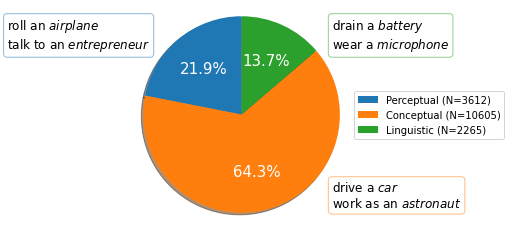

In [29]:
from matplotlib import pyplot as plt
results_dir = '/h/19/jadeleiyu/frame_extension/results/'

labels = ['Perceptual (N={})'.format(len(vis_idx)), 'Conceptual (N={})'.format(len(ont_idx)), 
          'Linguistic (N={})'.format(len(ling_idx))]
sizes = [len(vis_idx), len(ont_idx),len(ling_idx)]

fig1, ax1 = plt.subplots()
patches, _, autotexts = ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
# for text in texts:
#     text.set_fontsize(14)
for text in autotexts:
    text.set_fontsize(15) 
    text.set_color('white')

props_percept = dict(boxstyle='round', facecolor='None', alpha=0.5, edgecolor='tab:blue')
props_concept = dict(boxstyle='round', facecolor='None', alpha=0.5, edgecolor='tab:orange')
props_ling = dict(boxstyle='round', facecolor='None', alpha=0.5, edgecolor='tab:green')

# place a text box in upper left in axes coords
ax1.text(-0.2, 0.95, 'roll an $airplane$ \ntalk to an $entrepreneur$', transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props_percept)
ax1.text(0.77, 0.2, 'drive a $car$ \nwork as an $astronaut$', transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props_concept)
ax1.text(0.77, 0.95, 'drain a $battery$ \nwear a $microphone$', transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props_ling)


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=labels,loc='right', bbox_to_anchor=(1.3,0.5), fontsize=10)

plt.savefig(results_dir+'modes_pie.pdf', bbox_inches='tight')


In [2]:
import pandas as pd
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'
N = 0
for decade in range(1850, 2000, 10):
    df = pd.read_csv(prediction_dir+'{}_exemplar_loss_ling_noun.csv'.format(decade))
    N += len(df['frame'])

In [3]:
N

8764

In [6]:
from matplotlib import pyplot as plt
import torch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import numpy as np
prediction_dir = '/h/19/jadeleiyu/frame_extension/predictions/'

In [58]:
c0_e = (0.35, 0.3)
c1_e = (0.78, 0.44)
x_e = (0.59, 0.87)

cov_e = [[.01, 0], [0, .01]]

X0_e, Y0_e = np.random.multivariate_normal(c0_e, cov_e, 10).T
X1_e, Y1_e = np.random.multivariate_normal(c1_e, cov_e, 10).T

X0_e[-1] += 0.1
Y0_e[-1] += 0.4

X1_e[-1] += 0.1
Y1_e[-1] -= 0.3

X1_e[-1] -= 0.1
Y1_e[-1] -= 0.2


#####################

c0_p = (0.28, 0.22)
c1_p = (0.68, 0.32)
x_p = (0.48, 0.74)

cov_p = [[.01, 0], [0, .01]]

X0_p, Y0_p = np.random.multivariate_normal(c0_p, cov_p, 10).T
X1_p, Y1_p = np.random.multivariate_normal(c1_p, cov_p, 10).T

X0_p[-1] += 0.12
Y0_p[-1] += 0.5

X1_p[-1] += 0.1
Y1_p[-1] -= 0.3

X1_p[-1] -= 0.1
Y1_p[-1] -= 0.2

p_0 = np.array([[X0_p[i], Y0_p[i]] for i in range(len(X0_p))]).mean(0)
p_1 = np.array([[X1_p[i], Y1_p[i]] for i in range(len(X1_p))]).mean(0)

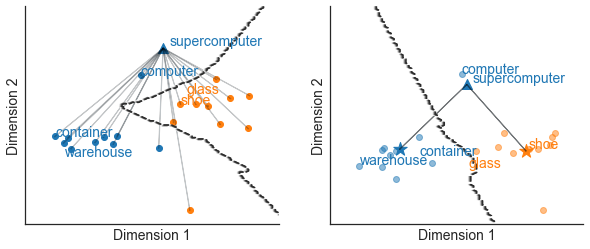

In [82]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
# ax[0].scatter(c0[0],c0[1])
# ax[0].scatter(c1[0],c1[1])
ax[0].scatter(x_e[0],x_e[1], color='tab:blue', marker='^', s=100)


ax[0].scatter(X0_e, Y0_e, color='tab:blue')
ax[0].scatter(X1_e, Y1_e, color='tab:orange')

clf = KNeighborsClassifier(n_neighbors=2)
X = np.array([[X0_e[i], Y0_e[i]] for i in range(len(X0_e))] + [[X1_e[i], Y1_e[i]] 
                                                               for i in range(len(X1_e))])
Y = np.array([0]*10 + [1]*10)
clf.fit(X,Y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .5
xx_exem, yy_exem = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z_exem = clf.predict(np.c_[xx_exem.ravel(), yy_exem.ravel()])
Z_exem = Z_exem.reshape(xx_exem.shape)

ax[0].contour(xx_exem, yy_exem, Z_exem, linestyles='dashed')

######################


ax[1].scatter(x_p[0],x_p[1], color='tab:blue', marker='^', s=100)


ax[1].scatter(X0_p, Y0_p, color='tab:blue', alpha=0.5)
ax[1].scatter(X1_p, Y1_p, color='tab:orange', alpha=0.5)
ax[1].scatter(p_0[0], p_0[1], color='tab:blue', s=200, marker='*')
ax[1].scatter(p_1[0], p_1[1], color='tab:orange', s=200, marker='*')

clf = KNeighborsClassifier(n_neighbors=15)
X = np.array([[X0_p[i], Y0_p[i]] for i in range(len(X0_p))] + [[X1_p[i], Y1_p[i]] 
                                                               for i in range(len(X1_p))])
Y = np.array([0]*10 + [1]*10)
clf.fit(X,Y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .5
xx_proto, yy_proto = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z_proto = clf.predict(np.c_[xx_proto.ravel(), yy_proto.ravel()])
Z_proto = Z_proto.reshape(xx_proto.shape)

ax[1].contour(xx_proto, yy_proto, Z_proto, linestyles='dashed')


ax[0].set_ylabel('Dimension 2', fontsize=14)
ax[1].set_ylabel('Dimension 2', fontsize=14)

ax[0].set_xlabel('Dimension 1', fontsize=14)
ax[1].set_xlabel('Dimension 1', fontsize=14)

ax[0].set_xticks([]) 
ax[0].set_yticks([]) 
ax[1].set_xticks([]) 
ax[1].set_yticks([])


ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[0].annotate('computer', 
                       xy=(X0_e[-1], Y0_e[-1]), 
                       xytext=(X0_e[-1], Y0_e[-1]), 
                       alpha=1,fontsize=14,
                       color='tab:blue')

ax[0].annotate('container', 
                       xy=(X0_e[-2], Y0_e[-2]), 
                       xytext=(X0_e[-2], Y0_e[-2]), 
                       alpha=1,fontsize=14,
                       color='tab:blue')
ax[0].annotate('warehouse', 
                       xy=(X0_e[-7], Y0_e[-7]), 
                       xytext=(X0_e[-7]-0.1, Y0_e[-7]-0.1), 
                       alpha=1,fontsize=14,
                       color='tab:blue')

ax[0].annotate('shoe', 
                       xy=(X1_e[-2], Y1_e[-2]), 
                       xytext=(X1_e[-2], Y1_e[-2]), 
                       alpha=1,fontsize=14,
                       color='tab:orange')
ax[0].annotate('glass', 
                       xy=(X1_e[-7], Y1_e[-7]), 
                       xytext=(X1_e[-7]-0.1, Y1_e[-7]-0.1), 
                       alpha=1,fontsize=14,
                       color='tab:orange')

ax[0].annotate('supercomputer', 
                       xy=(x_e[0], x_e[1]), 
                       xytext=(x_e[0]+0.02, x_e[1]+0.02), 
                       alpha=1,fontsize=14,
                       color='tab:blue')



ax[1].annotate('computer', 
                       xy=(X0_p[-1], Y0_p[-1]), 
                       xytext=(X0_p[-1], Y0_p[-1]), 
                       alpha=1,fontsize=14,
                       color='tab:blue')

ax[1].annotate('supercomputer', 
                       xy=(x_p[0], x_p[1]), 
                       xytext=(x_p[0]+0.02, x_p[1]+0.02), 
                       alpha=1,fontsize=14,
                       color='tab:blue')


ax[1].annotate('container', 
                       xy=(X0_p[-2], Y0_p[-2]), 
                       xytext=(X0_p[-2]+0.1, Y0_p[-2]), 
                       alpha=1,fontsize=14,
                       color='tab:blue')
ax[1].annotate('warehouse', 
                       xy=(X0_p[-7], Y0_p[-7]), 
                       xytext=(X0_p[-7]-0.2, Y0_p[-7]-0.2), 
                       alpha=1,fontsize=14,
                       color='tab:blue')

ax[1].annotate('shoe', 
                       xy=(X1_p[-2], Y1_p[-2]), 
                       xytext=(X1_p[-2], Y1_p[-2]), 
                       alpha=1,fontsize=14,
                       color='tab:orange')
ax[1].annotate('glass', 
                       xy=(X1_p[-7], Y1_p[-7]), 
                       xytext=(X1_p[-7]-0.1, Y1_p[-7]-0.15), 
                       alpha=1,fontsize=14,
                       color='tab:orange')

for i in range(len(X0_e)):
    ax[0].arrow(x_e[0], x_e[1], X0_e[i]-x_e[0], Y0_e[i]-x_e[1], alpha=0.2)

for i in range(len(X1_e)):
    ax[0].arrow(x_e[0], x_e[1], X1_e[i]-x_e[0], Y1_e[i]-x_e[1], alpha=0.2)

ax[1].arrow(x_p[0], x_p[1], p_0[0]-x_p[0], p_0[1]-x_p[1], alpha=0.5)
ax[1].arrow(x_p[0], x_p[1], p_1[0]-x_p[0], p_1[1]-x_p[1], alpha=0.5)

plt.savefig('/h/19/jadeleiyu/frame_extension/results/'+'chaining.pdf', bbox_inches='tight')